In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler

In [3]:
adata=sc.read_loom('Heiman_Glia12052022.loom')
adata

/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 24759 × 28793
    obs: 'Age', 'Barcode', 'Batch', 'CellType', 'Condition', 'Doublet_Threshold', 'Doublet_score', 'Grade', 'NBB_ID', 'PMI', 'Predicted_doublet', 'Region', 'Sex', 'mt_frac', 'n_counts', 'n_genes', 'obs_names', 'size_factors'
    var: 'feature_types', 'gene_ids', 'n_cells', 'var_names'
    layers: 'counts'

In [4]:
adata.obs_names=adata.obs.obs_names
adata.var_names=adata.var.var_names

In [5]:
adata.obs['Grade'].value_counts()

Control    12526
3           6296
2           3086
4           2851
Name: Grade, dtype: int64

In [6]:
adata=adata[adata.obs['Grade']=='Control']

In [13]:
adata.obs

,Age,Barcode,Batch,CellType,Condition,Doublet_Threshold,Doublet_score,Grade,NBB_ID,PMI,Predicted_doublet,Region,Sex,mt_frac,n_counts,n_genes,obs_names,size_factors
obs_names,,,,,,,,,,,,,,,,,,
AAACGCTAGACTTAAG-20,77,AAACGCTAGACTTAAG-20,20,Microglia,Control,0.677699,0.004645,Control,A47L,9.0,0,Putamen,F,0.006485,1542.0,1116,AAACGCTAGACTTAAG-20,0.419794
AAACGCTCACAACGAG-20,77,AAACGCTCACAACGAG-20,20,Astrocyte,Control,0.677699,0.013034,Control,A47L,9.0,0,Putamen,F,0.012854,3423.0,1950,AAACGCTCACAACGAG-20,0.687360
AAACGCTGTCGTTGCG-20,77,AAACGCTGTCGTTGCG-20,20,Microglia,Control,0.677699,0.012802,Control,A47L,9.0,0,Putamen,F,0.006281,1592.0,1099,AAACGCTGTCGTTGCG-20,0.428896
AAAGAACCACTGCGTG-20,77,AAAGAACCACTGCGTG-20,20,Astrocyte,Control,0.677699,0.013986,Control,A47L,9.0,0,Putamen,F,0.002428,3295.0,1885,AAAGAACCACTGCGTG-20,0.681675
AAAGAACGTACAAGTA-20,77,AAAGAACGTACAAGTA-20,20,Astrocyte,Control,0.677699,0.015233,Control,A47L,9.0,0,Putamen,F,0.001263,3168.0,1817,AAAGAACGTACAAGTA-20,0.632900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCACAGATTCGT-16,54,TTGTTCACAGATTCGT-16,16,Mural,Control,0.677699,0.039760,Control,A58R,9.5,0,Putamen,M,0.001065,1878.0,1244,TTGTTCACAGATTCGT-16,0.435056
TTGTTTGCAACAAGAT-16,54,TTGTTTGCAACAAGAT-16,16,Microglia,Control,0.677699,0.017232,Control,A58R,9.5,0,Putamen,M,0.000905,2210.0,1112,TTGTTTGCAACAAGAT-16,0.410014
TTTACCACACGGTGAA-16,54,TTTACCACACGGTGAA-16,16,Microglia,Control,0.677699,0.033624,Control,A58R,9.5,0,Putamen,M,0.003030,2310.0,1158,TTTACCACACGGTGAA-16,0.465911


In [14]:
adata.obs.CellType.value_counts()

Astrocyte    7138
Microglia    4810
Mural         578
Name: CellType, dtype: int64

In [15]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=1500)

Trying to set attribute `._uns` of view, copying.


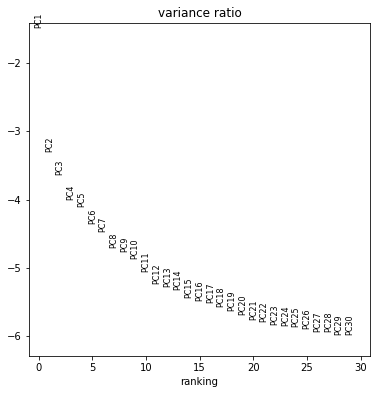

In [16]:
# Calculate the visualizations
plt.rcParams['figure.figsize']=(6,6) #rescale figures

n_pcs=30
sc.pp.pca(adata, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata,n_pcs, log=True)

In [17]:
%%time
sc.pp.neighbors(adata,n_pcs=21,random_state=42)
sc.tl.umap(adata,random_state=42)

CPU times: user 23.2 s, sys: 1.7 s, total: 24.9 s
Wall time: 21.5 s


... storing 'CellType' as categorical
... storing 'Condition' as categorical
... storing 'Grade' as categorical
... storing 'NBB_ID' as categorical
... storing 'Region' as categorical
... storing 'Sex' as categorical
... storing 'feature_types' as categorical


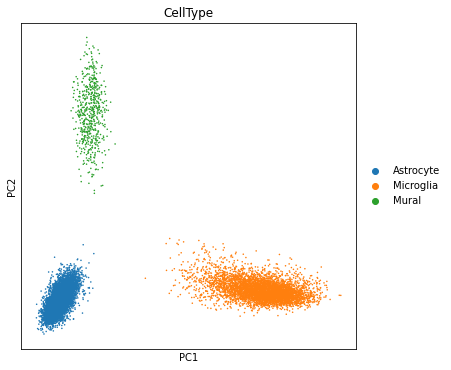

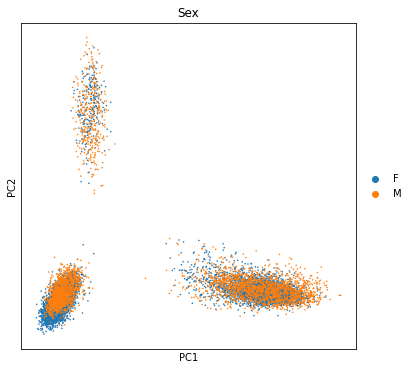

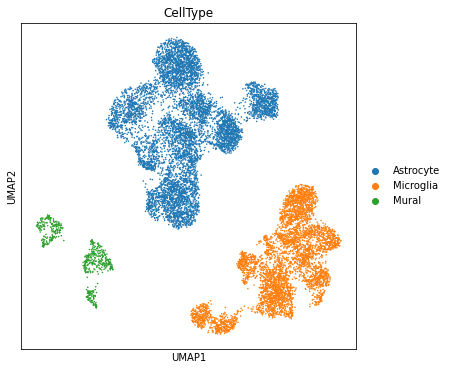

In [18]:
sc.pl.pca_scatter(adata, color='CellType')
sc.pl.pca_scatter(adata, color='Sex')

#sc.pl.tsne(adata, color='n_counts')
sc.pl.umap(adata, color='CellType')
#sc.pl.diffmap(adata, color='n_counts', components=['1,2','1,3'])
#sc.pl.draw_graph(adata, color='n_counts')

In [19]:
sc.tl.rank_genes_groups(adata, groupby='CellType', key_added='DE_Type',method='wilcoxon',pts=True)


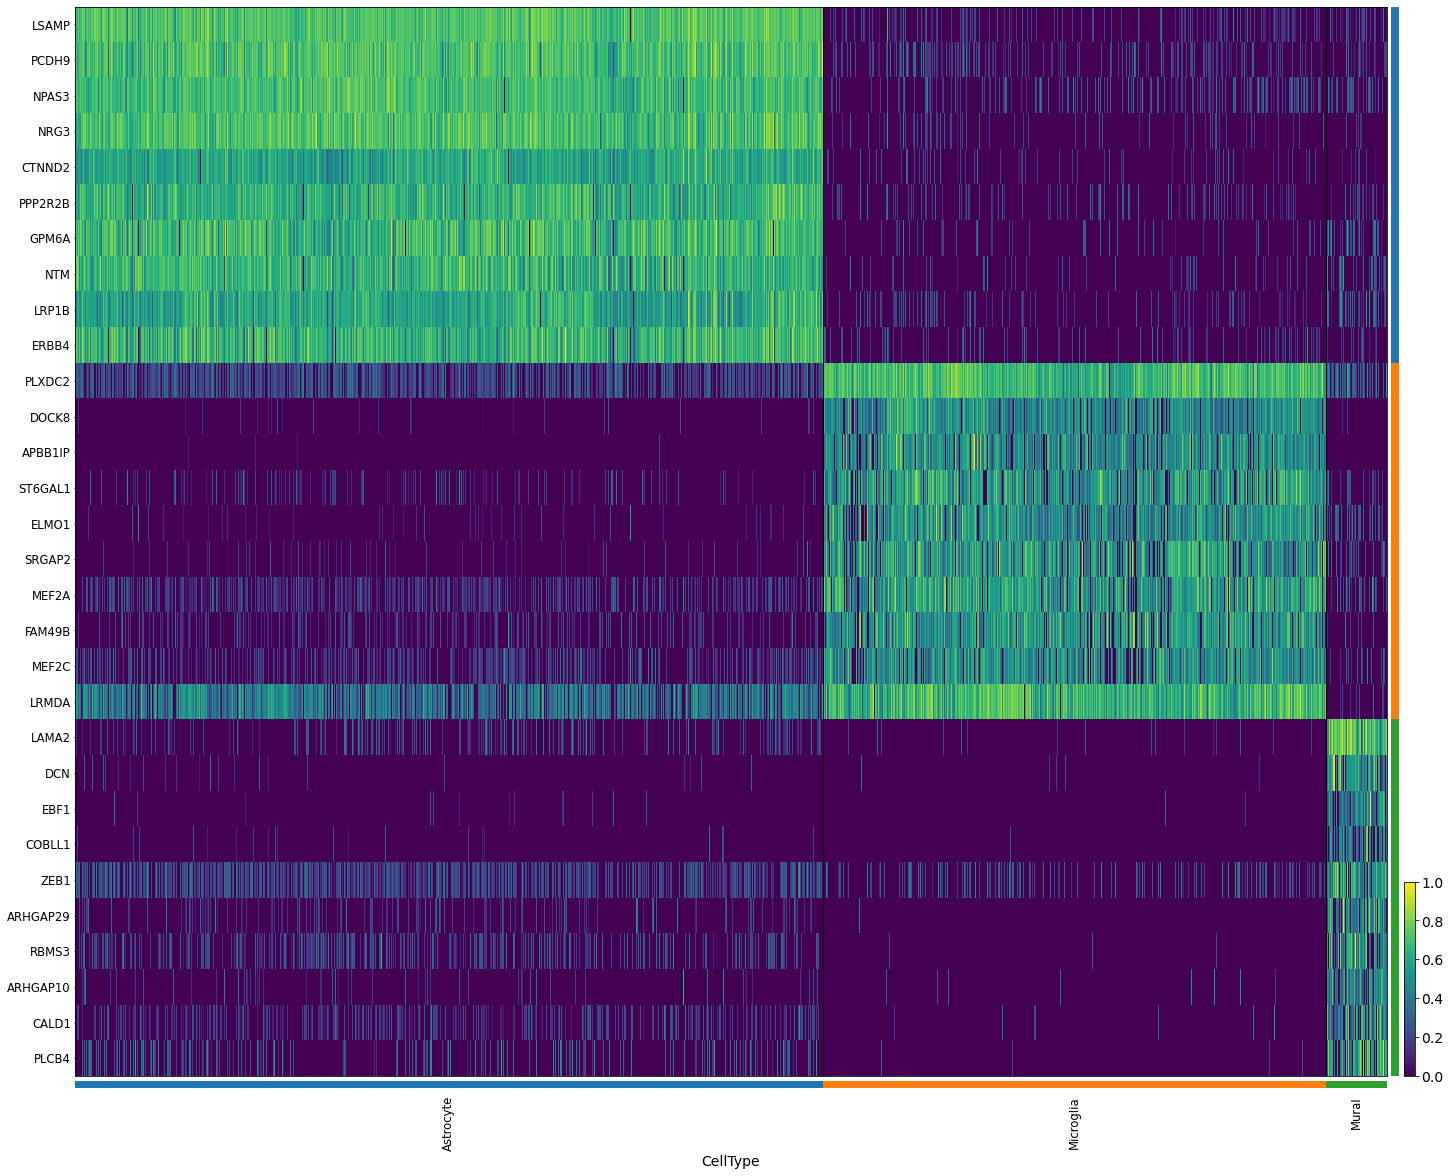

In [20]:
plt.rcParams.update({'font.size': 14})
sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, standard_scale='var', groupby='CellType',key='DE_Type',swap_axes=True,figsize=(24,20),show_gene_labels=True,dendrogram=False,min_logfoldchange=1)


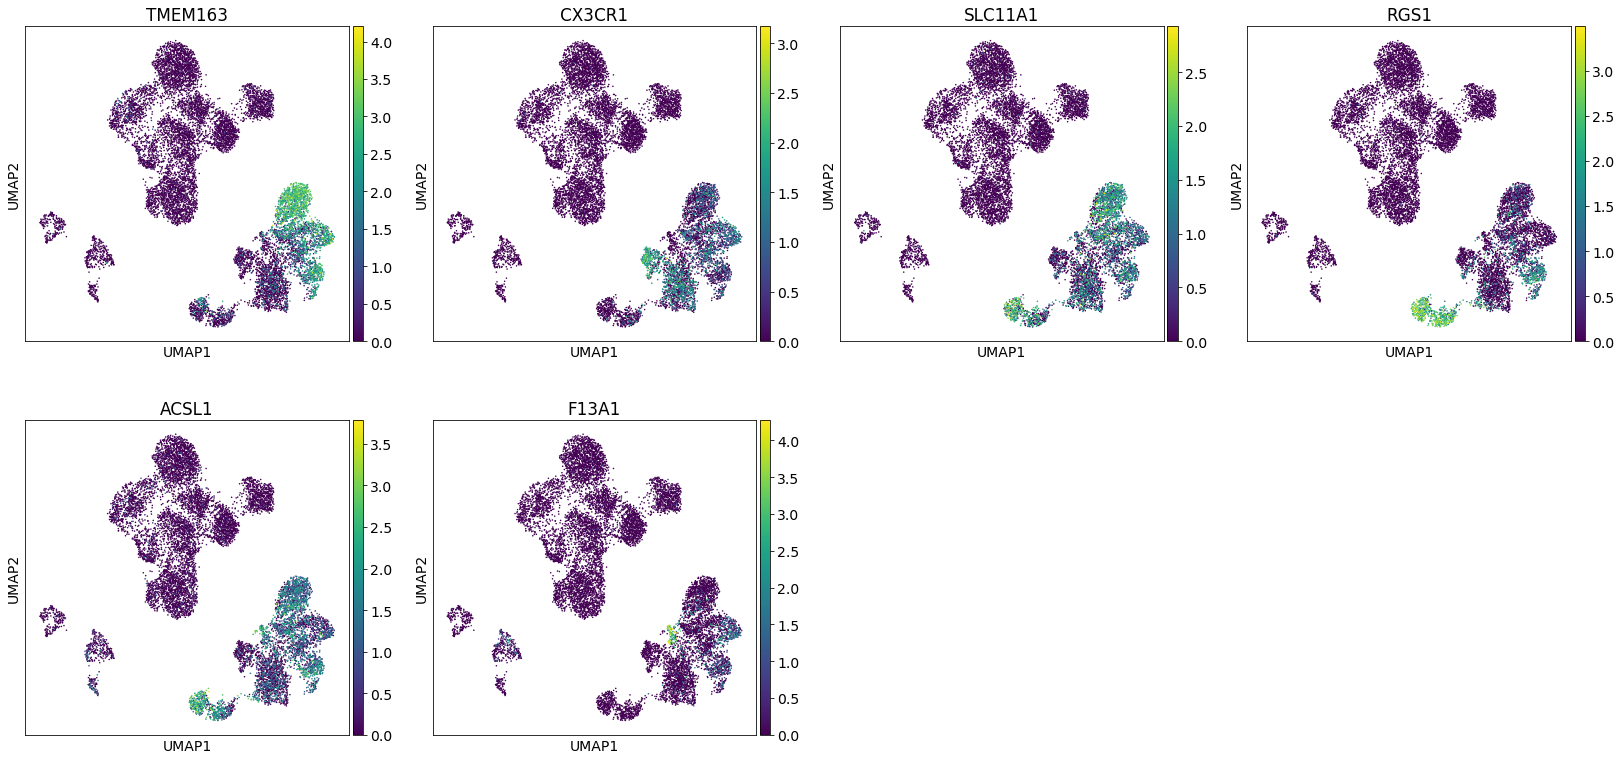

In [21]:
sc.pl.umap(adata, color=['TMEM163','CX3CR1','SLC11A1','RGS1','ACSL1','F13A1'])


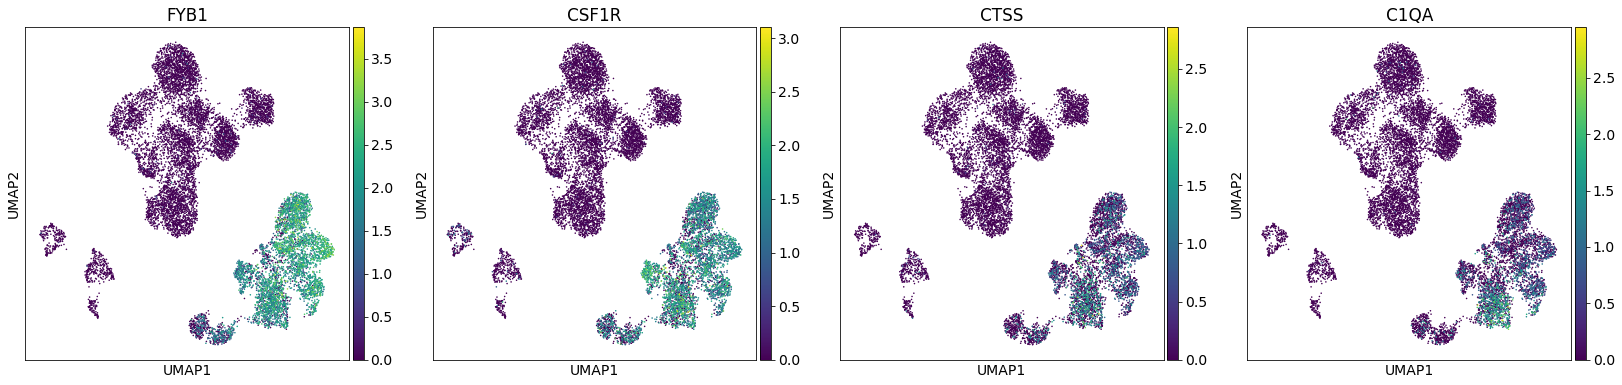

In [22]:
sc.pl.umap(adata, color=['FYB1','CSF1R','CTSS', 'C1QA'])



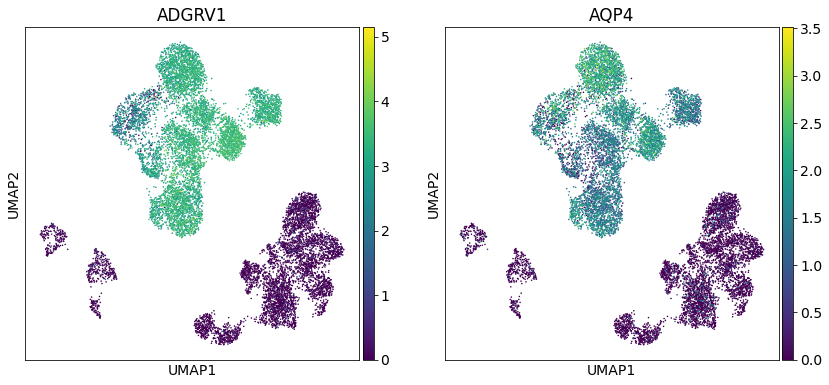

In [23]:
sc.pl.umap(adata, color=['ADGRV1', 'AQP4'])


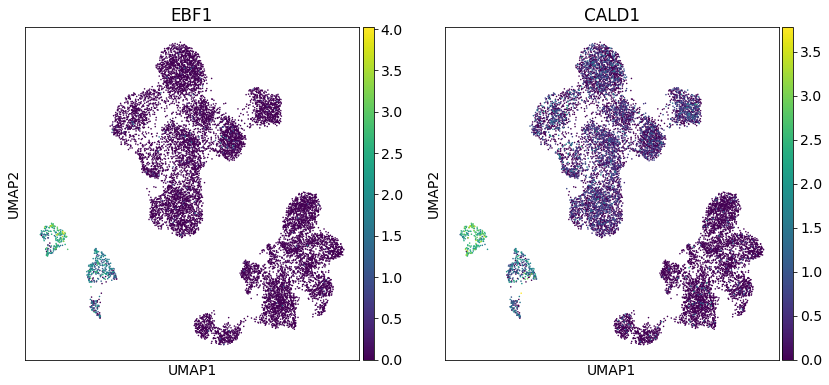

In [24]:
sc.pl.umap(adata, color=['EBF1', 'CALD1'])


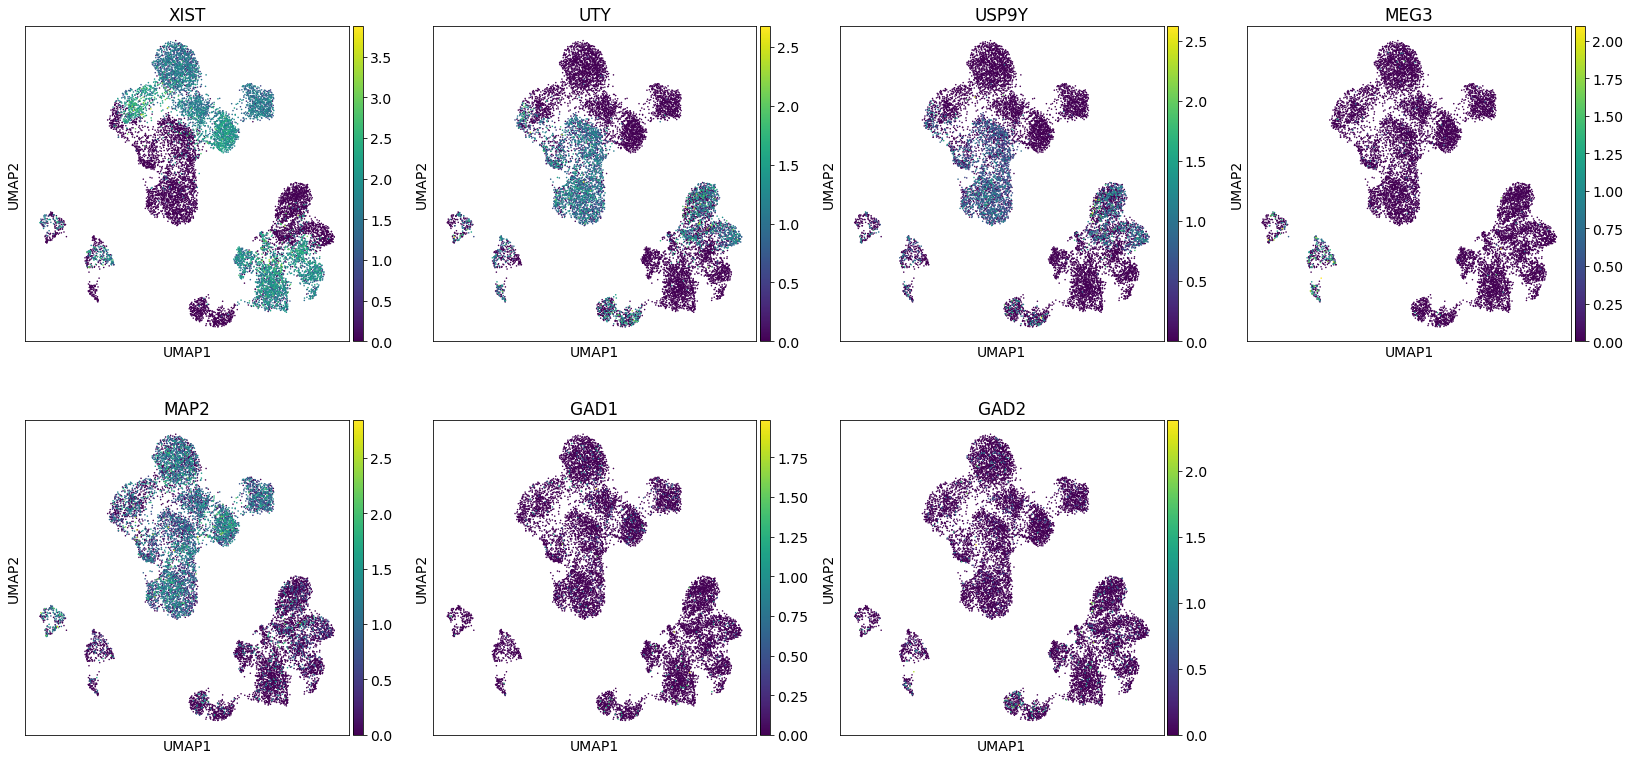

In [25]:
sc.pl.umap(adata, color=['XIST', 'UTY','USP9Y','MEG3','MAP2','GAD1','GAD2'])


In [26]:
sub=adata[adata.obs.CellType!='Mural',['XIST','UTY','USP9Y','ADGRV1', 'AQP4','LSAMP','PCDH9','FYB1','CSF1R','CTSS','MEG3','GAD1','GAD2']]


In [31]:
sc.pp.highly_variable_genes(sub, flavor='seurat', n_top_genes=1500)

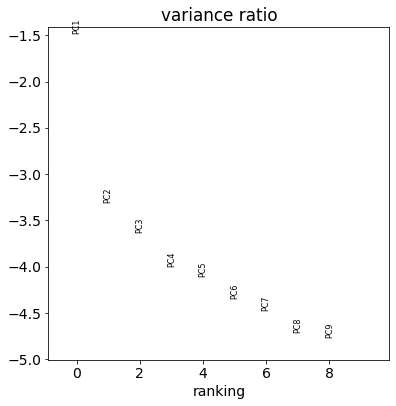

In [32]:
# Calculate the visualizations
plt.rcParams['figure.figsize']=(6,6) #rescale figures

n_pcs=9
sc.pp.pca(sub, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca_variance_ratio(sub,n_pcs, log=True)

In [33]:
%%time
sc.pp.neighbors(sub,n_pcs=3,random_state=42)
sc.tl.umap(sub,random_state=42)

CPU times: user 8.52 s, sys: 2.29 s, total: 10.8 s
Wall time: 6.58 s


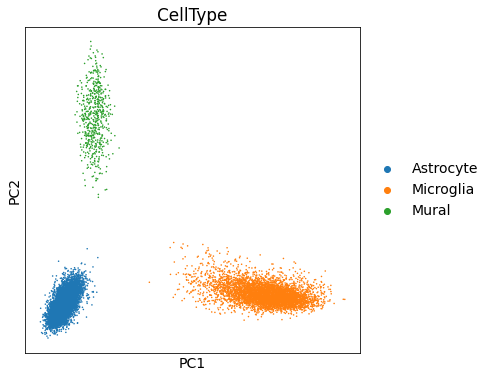

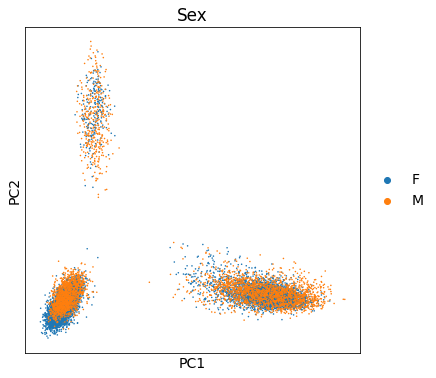

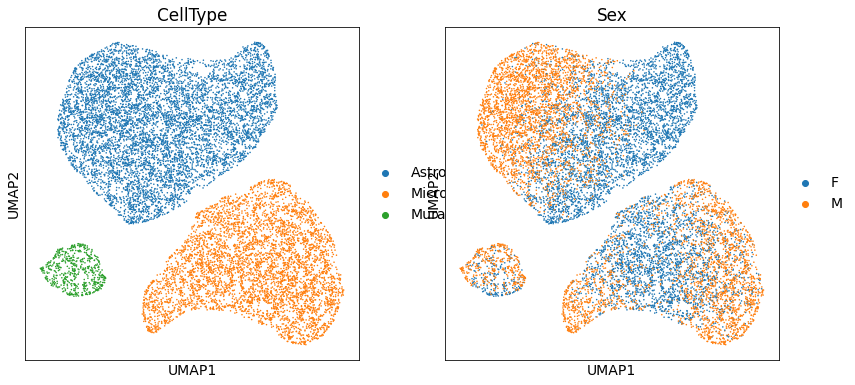

In [34]:
sc.pl.pca_scatter(sub, color='CellType')
sc.pl.pca_scatter(sub, color='Sex')

#sc.pl.tsne(adata, color='n_counts')
sc.pl.umap(sub, color=['CellType','Sex'])
#sc.pl.diffmap(adata, color='n_counts', components=['1,2','1,3'])
#sc.pl.draw_graph(adata, color='n_counts')

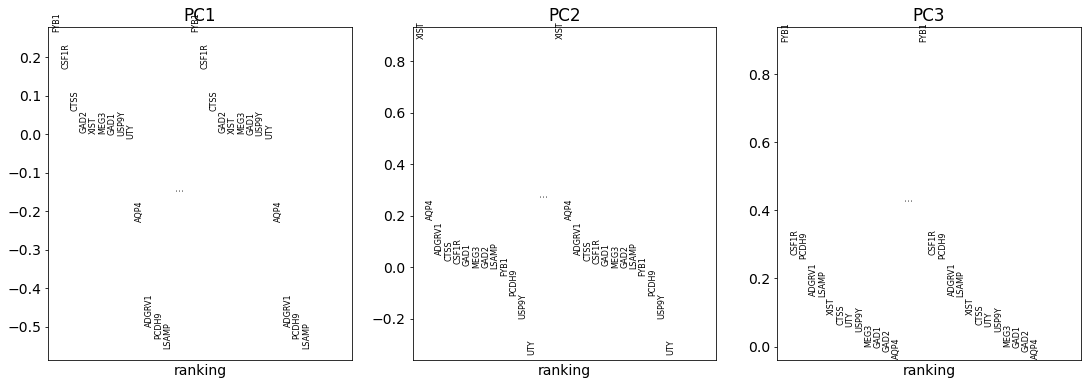

In [101]:
sc.pl.pca_loadings(sub)

In [103]:
sub.uns['pca']

{'params': {'zero_center': True, 'use_highly_variable': True},
 'variance': array([8.783468  , 0.9531349 , 0.3564245 , 0.2748486 , 0.22602151,
        0.21246089, 0.16303599, 0.1594686 , 0.12530534], dtype=float32),
 'variance_ratio': array([0.7696958 , 0.08352327, 0.0312335 , 0.024085  , 0.01980628,
        0.01861796, 0.01428685, 0.01397424, 0.01098051], dtype=float32)}

In [104]:
0.7696958+0.08352327

0.8532190700000001

In [105]:
np.sum(sub.uns['pca']['variance_ratio'])

0.9862034

([<matplotlib.axis.XTick at 0x7f8ed7383cf8>,
 [Text(0, 0, 'PC1'),
  Text(1, 0, 'PC2'),
  Text(2, 0, 'PC3'),
  Text(3, 0, 'PC4'),
  Text(4, 0, 'PC5'),
  Text(5, 0, 'PC6'),
  Text(6, 0, 'PC7'),
  Text(7, 0, 'PC8'),
  Text(8, 0, 'PC9')])

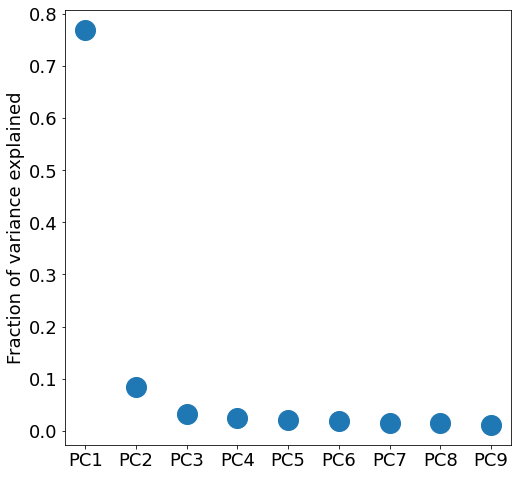

In [118]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
plt.rcParams.update({'font.size': 18})
plt.plot(sub.uns['pca']['variance_ratio'],'o',markersize=20)
plt.ylabel('Fraction of variance explained')
plt.xticks(ticks=np.arange(9),labels=['PC'+i.astype(str) for i in np.arange(10)[1:]])
#plt.xlabel('PC')


In [124]:
sub.varm['PCs'].shape

(13, 9)

In [125]:
sub

AnnData object with n_obs × n_vars = 11948 × 13
    obs: 'Age', 'Barcode', 'Batch', 'CellType', 'Condition', 'Doublet_Threshold', 'Doublet_score', 'Grade', 'NBB_ID', 'PMI', 'Predicted_doublet', 'Region', 'Sex', 'mt_frac', 'n_counts', 'n_genes', 'obs_names', 'size_factors'
    var: 'feature_types', 'gene_ids', 'n_cells', 'var_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'CellType_colors', 'Sex_colors', 'DE_Type'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [174]:
loadings=pd.DataFrame(sub.varm['PCs'],columns=['PC'+i.astype(str) for i in np.arange(10)[1:]])
loadings['names']=sub.var_names.values
loadings['type']=['X-linked gene','Y-linked gene','Y-linked gene',
                  'Astrocyte marker','Astrocyte marker','Astrocyte marker','Astrocyte marker',
                  'Microglia marker','Microglia marker','Microglia marker',
                  'Neuronal gene','Neuronal gene','Neuronal gene']

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,names,type
0,0.000694,0.888823,0.093333,-0.225416,-0.031664,-0.046290,-0.093483,0.361110,-0.046326,XIST,X-linked gene
1,-0.012728,-0.342967,0.057808,-0.004478,0.031090,0.003116,-0.297231,0.822478,-0.013549,UTY,Y-linked gene
2,-0.006313,-0.202816,0.043232,0.004984,0.000049,0.004876,-0.100538,0.257009,-0.069239,USP9Y,Y-linked gene
3,-0.501426,0.047494,0.147675,0.105914,0.193641,0.754809,0.307943,0.102293,-0.027450,ADGRV1,Astrocyte marker
4,-0.228190,0.185275,-0.037094,0.906914,0.014928,-0.285543,-0.027144,0.078478,0.029317,AQP4,Astrocyte marker
5,-0.558170,-0.008552,0.145444,-0.139177,-0.017057,-0.028792,-0.747282,-0.295412,0.030524,LSAMP,Astrocyte marker
6,-0.531782,-0.112841,0.258383,-0.272471,-0.020485,-0.562668,0.483988,0.100316,0.044214,PCDH9,Astrocyte marker
7,0.264199,-0.032831,0.893941,0.147136,-0.304012,0.075689,-0.016335,-0.079994,-0.049165,FYB1,Microglia marker
8,0.169226,0.013974,0.267784,-0.003871,0.929239,-0.145550,-0.064682,-0.069951,-0.075013,CSF1R,Microglia marker
9,0.059176,0.023253,0.061994,-0.010687,0.060605,0.046367,-0.010418,0.041983,0.990111,CTSS,Microglia marker


In [175]:
loadings=loadings.sort_values('PC1',ascending=False)

Text(0.5, 0, '')

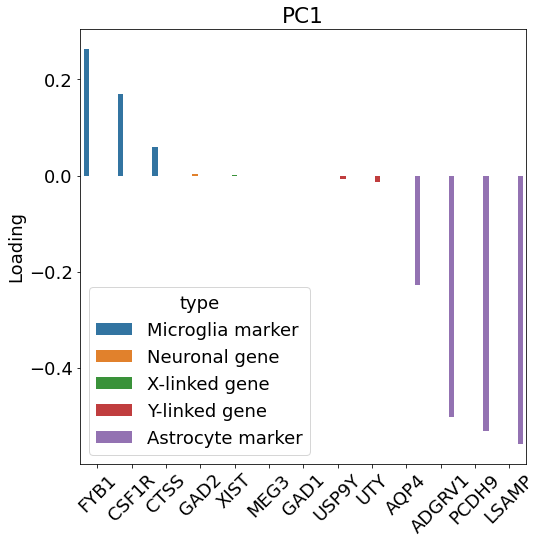

In [176]:
import seaborn as sns
g=sns.barplot(data=loadings,y='PC1',x='names',hue='type')
for item in g.get_xticklabels():
    item.set_rotation(45)
plt.title('PC1')
plt.ylabel('Loading')
plt.xlabel('')

Text(0.5, 0, '')

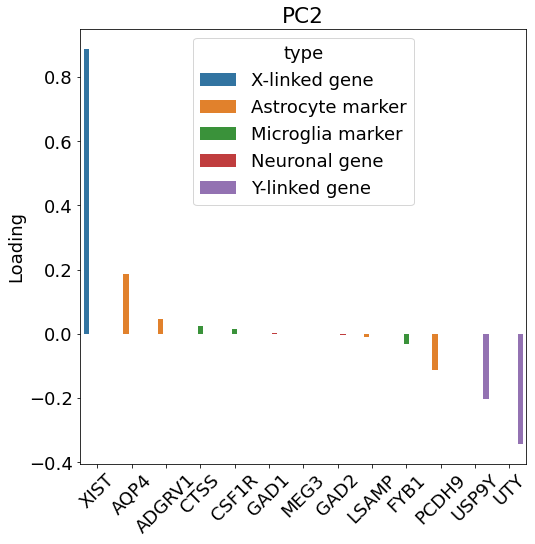

In [177]:
loadings=loadings.sort_values('PC2',ascending=False)
import seaborn as sns
g=sns.barplot(data=loadings,y='PC2',x='names',hue='type')
for item in g.get_xticklabels():
    item.set_rotation(45)
plt.title('PC2')
plt.ylabel('Loading')
plt.xlabel('')

(0.0, 12.0)

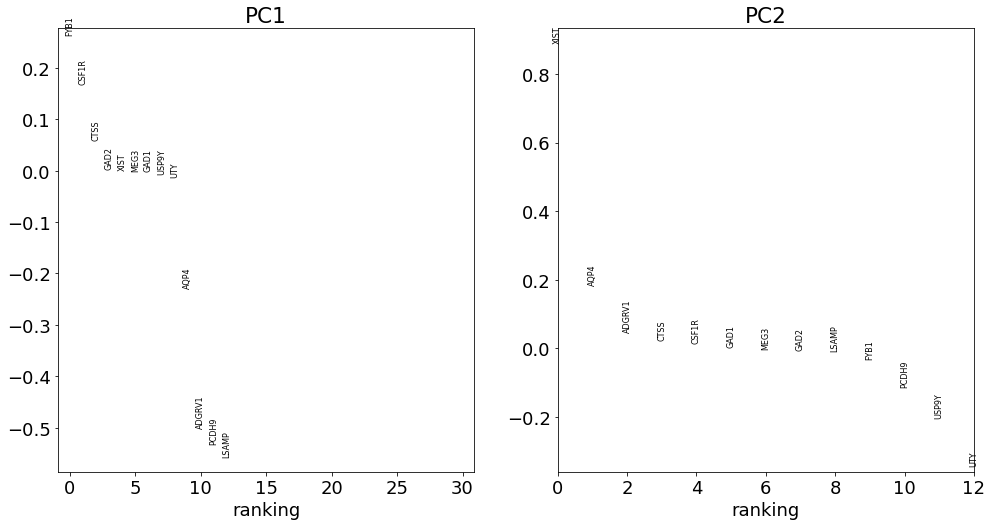

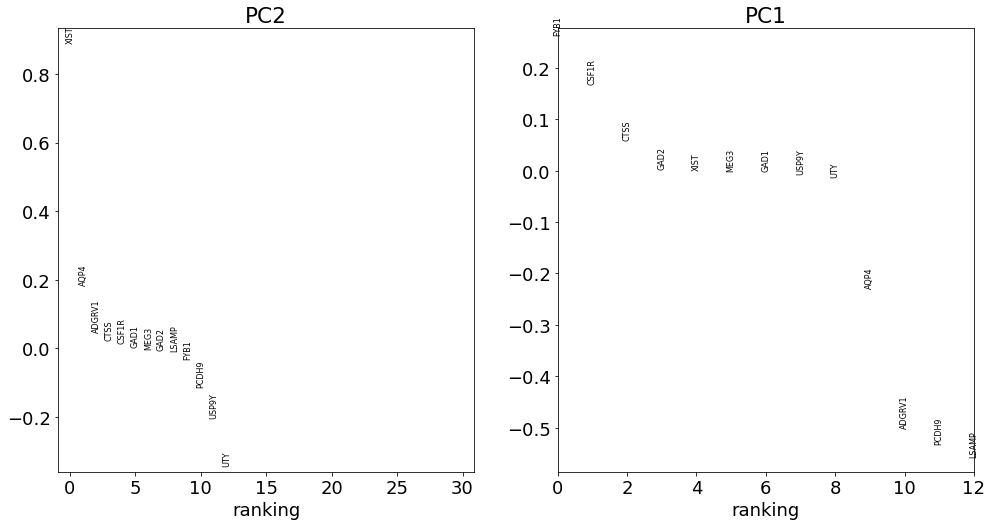

In [178]:
sc.pl.pca_loadings(sub,components='1,2',include_lowest=False,show=False)
plt.gca().set_xlim([0,12])
sc.pl.pca_loadings(sub,components='2,1',include_lowest=False,show=False)
plt.gca().set_xlim([0,12])

In [133]:
np.argmax(sub.varm['PCs'][:,0])

7

In [134]:
sub.var_names[7]

'FYB1'